In [1]:
#estimate profit of a company
#so install necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#read the file
data=pd.read_csv("/Users/saravana-pt1623/Desktop/personal/machine-learning-ex1 3/ex1/ex1data1.txt"
                 ,header=None,names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


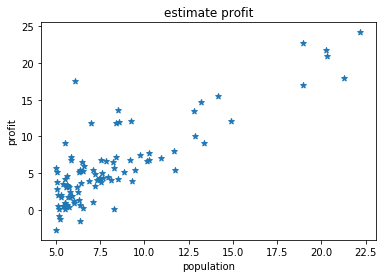

In [3]:
plt.scatter(data['population'],data['profit'],marker='*')
plt.title('estimate profit')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [7]:
#convert to matrix for operations
x=data.as_matrix(columns=['population'])
y=data.as_matrix(columns=['profit'])
#size
m=len(y)
print(m)
#feautures
n=x.shape[1]+1

X=np.c_[np.ones(m),x]

theta=np.zeros(n)
theta=np.asmatrix(theta)

97


In [8]:
def cost(X,y,theta):
    h=np.dot(X,theta.T)
    j=(1/(2*m))*(np.sum(np.square(h-y)))
    return j
print(cost(X,y,theta))

32.072733877455676


In [9]:
def gradient(X,y,iters=1500,alpha=0.01):
    m=len(y)
    theta=np.zeros(n)
    theta=np.asmatrix(theta)
    theta=theta.T
    for i in range(iters):
        h=np.dot(X,theta)
#         print(theta.shape)
        theta=theta-(alpha/m)*(X.T.dot((h-y)))
    return theta
theta=gradient(X,y)

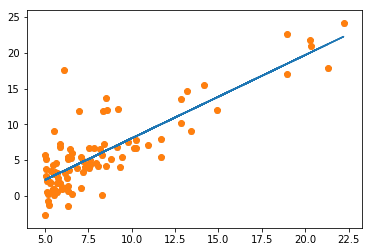

In [10]:
plt.scatter(data['population'],data['profit'],marker='*')
# xx=np.arange(5,25)
plt.scatter(x, y)

plt.plot(x, X.dot(theta), label='Linear Regression')

In [11]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out j_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = cost(X, y, t)

# We need to transpose J_vals before calling plot_surface, or else the axes will be flipped.
J_vals = J_vals.T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)


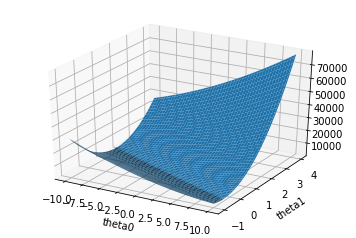

In [12]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# Surface plot

ax = plt.figure().gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
plt.show()

/Users/saravana-pt1623/sample/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


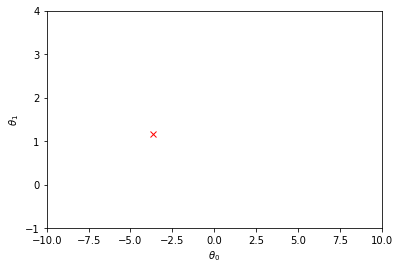

In [13]:

plt.figure()
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], linestyle='', marker='x', color='r')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()